# Importing Libraries and Reading Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import missingno as msno # visualisation of missing values in the form of visual matrix
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('netflix_titles.csv')
# To display the top 5 rows
df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Preprocessing

In [3]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
# converting str to datetime64
df['date_added'] = pd.to_datetime(df['date_added'])

# splitting the date into years and months and storing them in different columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print('-----------------------------------------------------------------------------------------------------------')
print(f'This dataset contains Movies and TV Shows added on Netflix from {df.date_added.min()} to {df.date_added.max()}.')
print('-----------------------------------------------------------------------------------------------------------\n')
df.info()

-----------------------------------------------------------------------------------------------------------
This dataset contains Movies and TV Shows added on Netflix from 2008-01-01 00:00:00 to 2021-09-25 00:00:00.
-----------------------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration     

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
month_added       10
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

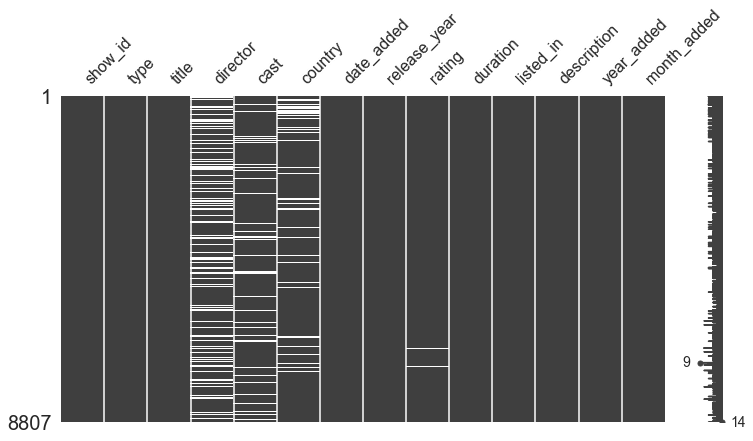

In [5]:
print(df.isnull().sum()) #summing up all the rows having missing values corresponding to their columns
msno.matrix(df, figsize=(12,6))
plt.show

In [6]:
temp = df[df['date_added'].isnull()].index #storing all the indices of null values in column 'date_added'
df.loc[temp] #accessing group of rows having null values of 'date_added'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN,NaN
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN,NaN
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN,NaN
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN,NaN
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN,NaN
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,NaN
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,NaN
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN,NaN


### Data cleaning

In [7]:
for rows in temp:
    if df.loc[rows, 'release_year']<df['year_added'].min():
        df.loc[rows, 'year_added'] = df['year_added'].min()
        df.loc[rows, 'month_added'] = 12
    else:
        df.loc[rows, 'year_added'] = df.loc[rows, 'release_year']
        df.loc[rows, 'month_added'] = 12
        
df.drop('date_added', axis=1, inplace=True)
df['year_added'] = df['year_added'].astype('int')
df['month_added'] = df['month_added'].astype('int')

df['director'].fillna('Not Given', inplace = True)
df['cast'].fillna('Not Given', inplace = True)
df['country'].fillna(df['country'].mode()[0], inplace = True)
df['rating'].fillna(df['rating'].mode()[0], inplace = True)
df['duration'].fillna(df['duration'].mode()[0], inplace = True)

df = df.sort_values(by=['year_added', 'month_added'])

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

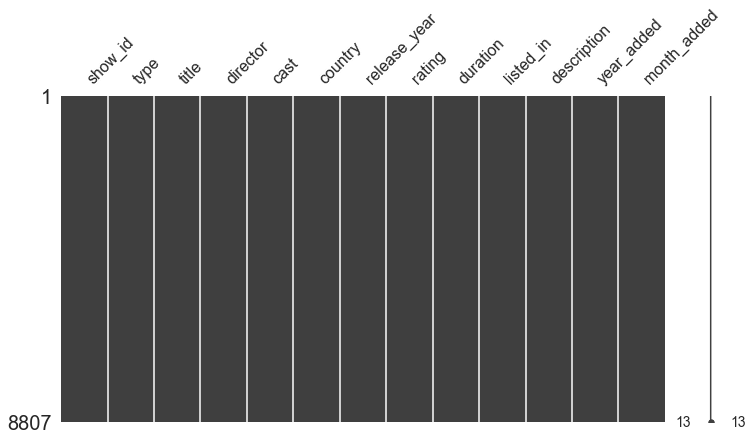

In [8]:
# double checking
print(df.isnull().sum()) #summing up all the rows having missing values corresponding to their columns
msno.matrix(df, figsize=(12,6))
plt.show

In [9]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
#splitting
tv = df[df['type']=='TV Show'].sort_values(by=['year_added','month_added'])
mv = df[df['type']=='Movie'].sort_values(by=['year_added','month_added'])

tv['seasons'] = tv['duration'].apply(lambda x:int(x.split()[0]))
mv['minutes'] = mv['duration'].apply(lambda x:int(x.split()[0]))

In [11]:
tv.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,seasons
6611,s6612,TV Show,Dinner for Five,Not Given,Not Given,United States,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008,2,1
6795,s6796,TV Show,Frasier,Not Given,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,2008,12,11
6806,s6807,TV Show,Friends,Not Given,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,2008,12,10
6901,s6902,TV Show,Gunslinger Girl,Not Given,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",2008,12,2
7196,s7197,TV Show,Kikoriki,Not Given,Igor Dmitriev,United States,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2010,12,2


In [12]:
mv.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,minutes
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008,1,81
5956,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2007,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009,5,104
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009,11,29
7370,s7371,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010,11,84
5954,s5955,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",2010,TV-MA,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...,2011,5,103


In [13]:
# getting number of contents (TV Shows or Movies) by year

movie_added = mv.groupby('year_added').count()['title'] #group by year and count by movie title
tv_added = tv.groupby('year_added').count()['title'] 

#creating new column
yearly_add = pd.concat([movie_added, tv_added], axis = 1)
yearly_add.columns = ['Movies', 'TV Shows']
yearly_add.fillna(0, inplace = True) # add this line to avoid any conversion errors
yearly_add = yearly_add.astype('int')

yearly_add

,Movies,TV Shows
year_added,,
2008,1,4
2009,2,0
2010,1,1
2011,13,0
2012,3,1
2013,6,6
2014,19,5
2015,56,28
2016,253,177


# Visualizations

### Donut Chart

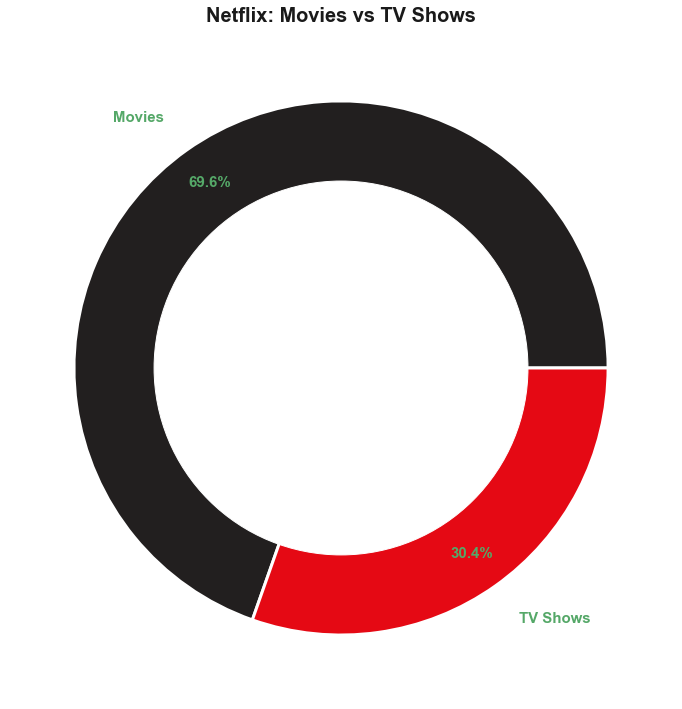

In [14]:
# Useful website: https://www.python-graph-gallery.com/

total = yearly_add.sum()
names = list(total.index)
size_of_groups = list(total.values)

fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')

plt.pie(size_of_groups,
        labels=names,
        labeldistance=1.15,
        wedgeprops={'linewidth':3, 'edgecolor':'white'},
        autopct='%1.1f%%',
        pctdistance=0.85,
        textprops={'fontsize': 15, 'color':'g', 'weight':'bold'},
        colors=['#221f1f', '#e50914'])

# Comment these three lines to make a Pie Chart, I prefer to use a Donut chart.
my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Netflix: Movies vs TV Shows', fontsize=20, y=1.01, fontweight='bold', color='k')
plt.tight_layout()
plt.show()

### Bar Chart, Stacked Bar Chart and Line Plot (Normal and Cumulative)

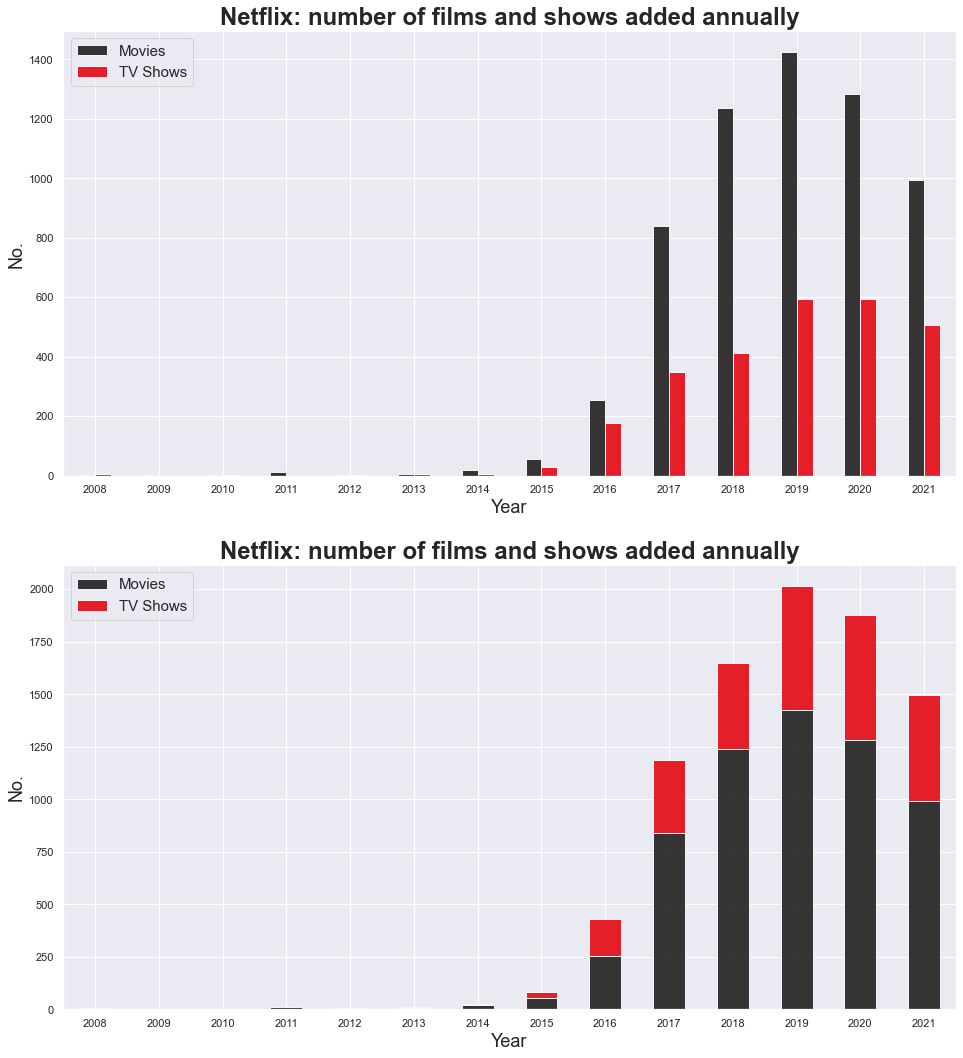

In [15]:
# 2 * (16, 9)
fig, ax = plt.subplots(2, 1, figsize=(16,18))

yearly_add.plot(kind='bar', color=['#221f1f', '#e50914'], alpha=0.9, ax=ax[0])
ax[0].set_xlabel('Year', fontsize=18)
ax[0].set_ylabel('No.', fontsize=18)
ax[0].set_title('Netflix: number of films and shows added annually', fontsize=24, fontweight='bold')
ax[0].tick_params(labelrotation=0)
ax[0].legend(loc=2, fontsize=15)

yearly_add.plot(kind='bar', stacked=True, color=['#221f1f', '#e50914'], alpha=0.9, ax=ax[1])
ax[1].set_xlabel('Year', fontsize=18)
ax[1].set_ylabel('No.', fontsize=18)
ax[1].set_title('Netflix: number of films and shows added annually', fontsize=24, fontweight='bold')
ax[1].tick_params(labelrotation=0)
ax[1].legend(loc=2, fontsize=15)

plt.show()

In [16]:
yearly_cum = yearly_add.cumsum()
yearly_cum

,Movies,TV Shows
year_added,,
2008,1,4
2009,3,4
2010,4,5
2011,17,5
2012,20,6
2013,26,12
2014,45,17
2015,101,45
2016,354,222


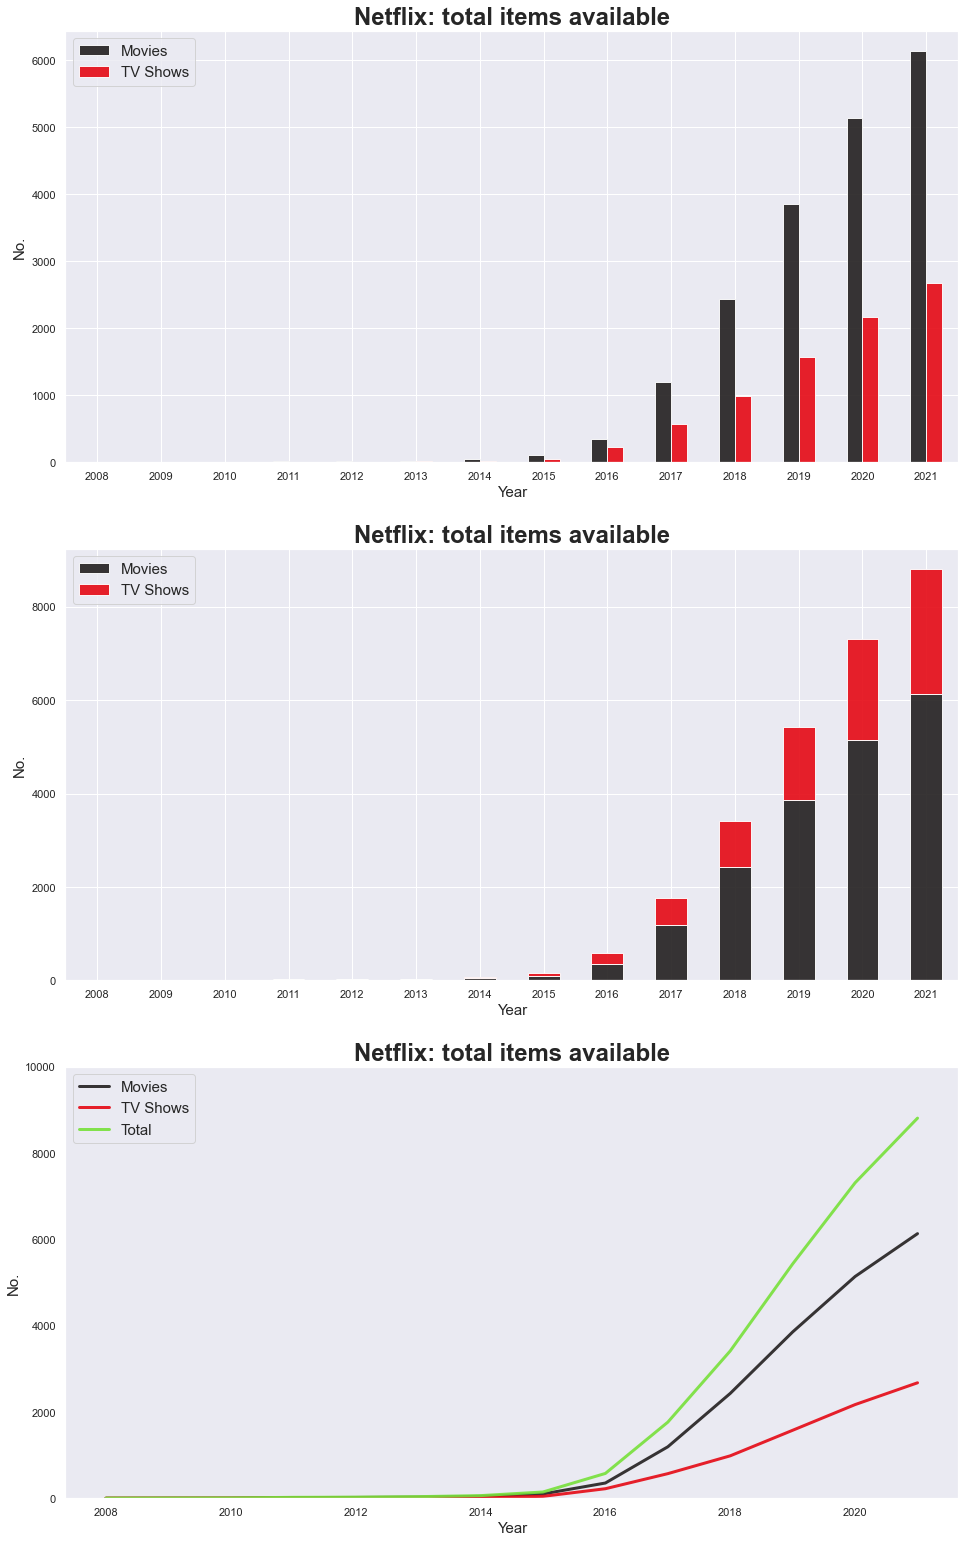

In [17]:
# 3 * (16, 9)
fig, ax = plt.subplots(3, 1, figsize=(16,27))

yearly_cum.plot(kind='bar', color=['#221f1f', '#e50914'], alpha=0.9, ax=ax[0])
ax[0].set_xlabel('Year', fontsize=15)
ax[0].set_ylabel('No.', fontsize=15)
ax[0].set_title('Netflix: total items available', fontsize=24, fontweight='bold')
ax[0].tick_params(labelrotation=0)
ax[0].legend(loc=2, fontsize=15)

yearly_cum.plot(kind='bar', stacked=True, color=['#221f1f', '#e50914'], alpha=0.9, ax=ax[1])
ax[1].set_xlabel('Year', fontsize=15)
ax[1].set_ylabel('No.', fontsize=15)
ax[1].set_title('Netflix: total items available', fontsize=24, fontweight='bold')
ax[1].tick_params(labelrotation=0)
ax[1].legend(loc=2, fontsize=15)

yearly_cum.plot(color=['#221f1f', '#e50914'], alpha=0.9, linewidth=3, ax=ax[2])
ax[2].plot(yearly_cum.sum(axis=1), color='#77e03a', alpha=0.9, linewidth=3, label='Total')
ax[2].set_xlabel('Year', fontsize=15)
ax[2].set_ylabel('No.', fontsize=15)
ax[2].set_ylim([0,10000])
ax[2].set_title('Netflix: Total items available', fontsize=24, fontweight='bold')
ax[2].legend(loc=2, fontsize=15)
ax[2].grid()

plt.show()

### Heatmaps

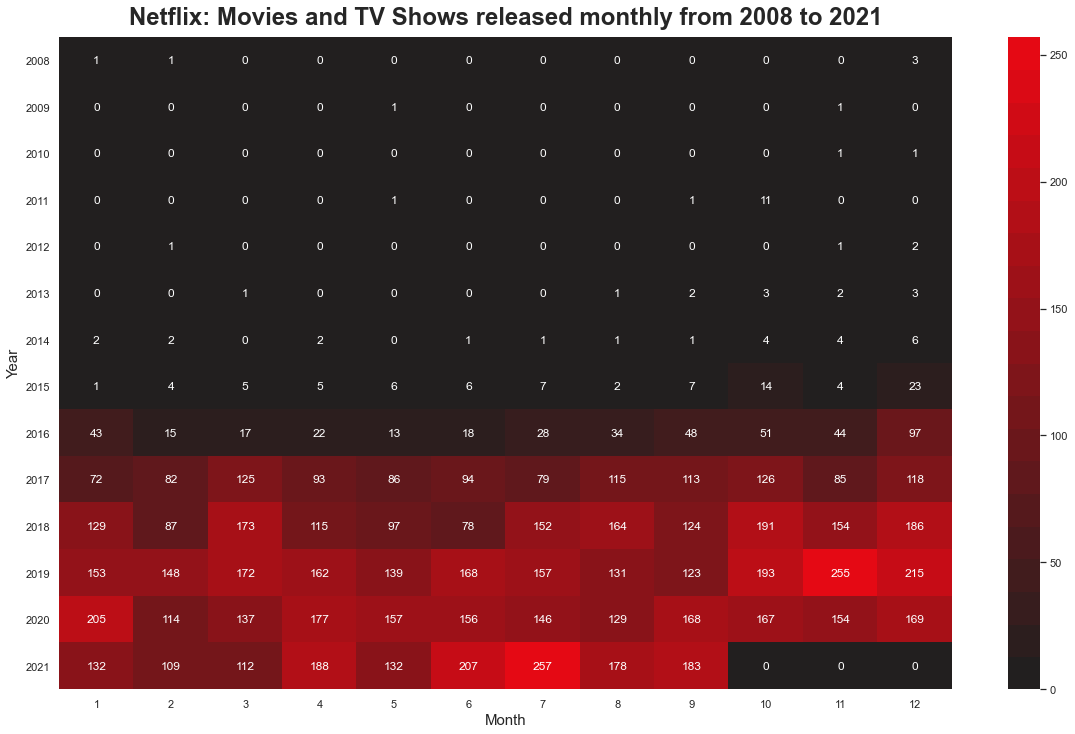

In [18]:
cross = pd.crosstab(df.year_added, df.month_added)

from matplotlib.colors import LinearSegmentedColormap
colors = ['#221f1f', '#e50914']
cm = LinearSegmentedColormap.from_list("Custom", colors, N=20)

plt.figure(figsize=(20,12))
sns.heatmap(cross, cmap=cm, annot=True, fmt='g')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Year', fontsize=15)
plt.yticks(rotation=0)
plt.title('Netflix: Movies and TV Shows released monthly from 2008 to 2021', fontsize=24, fontweight='bold', y=1.01)
plt.show()